# KMeans Clustering of Iris Dataset

### Importing the libraries

In [400]:
# Importing libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

### Importing the dataset

In [401]:
dataset = pd.read_csv('Iris.csv')
print(dataset.head())

# get unique values of species
print("\n\nUnique values of species: ", dataset['Species'].unique())

sepal_length = dataset['SepalLengthCm']
petal_length = dataset['PetalLengthCm']

species = dataset['Species']
data = np.array(list(zip(dataset['SepalLengthCm'], dataset['PetalLengthCm'],)))
print("\n\nData: ", data)



   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Unique values of species:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Data:  [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3

### Plotting the dataset

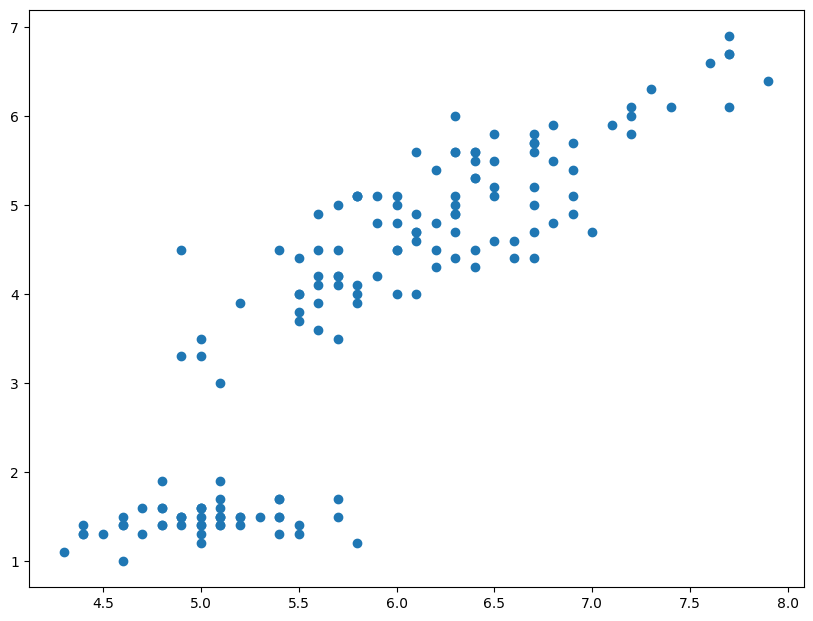

In [402]:
# Plot the data
plt.scatter(dataset['SepalLengthCm'],dataset['PetalLengthCm'])


### KMeans Clustering Class

In [403]:
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=1000):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}
        self.sse = []
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    self.sse.append(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


In [404]:
def getColor(classification):
    if classification == 0:
        return 'r'
    elif classification == 1:
        return 'g'
    elif classification == 2:
        return 'b'
    else:
        return 'y'

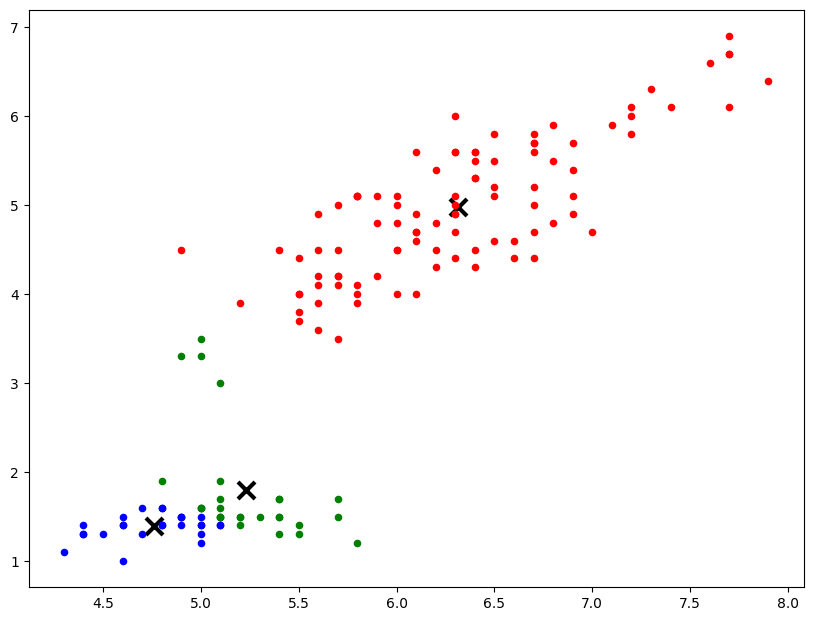

In [405]:
model = K_Means(k=3, tol=0.001, max_iter=5000)
model.fit(data)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="x", color="k", s=150, linewidths=3)
for classification in model.classifications:
    # get diff color
    color = getColor(classification)
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1],
                    marker="o", color=color, s=20, linewidths=1)

plt.show()

In [406]:
fig = px.line(y=model.sse,template="seaborn",title='Eblow Method')
fig.update_layout(width=800, height=600,
title_font_color="#BF40BF", 
xaxis=dict(color="#BF40BF",title="Clusters"), 
yaxis=dict(color="#BF40BF",title="SSE"))


### Predicting the clusters

In [407]:
# take input from dataset
data = np.array(list(
    zip(dataset['SepalLengthCm'], dataset['PetalLengthCm'], dataset['Species'])))
# get random data
y_pred = data[np.random.choice(data.shape[0], 3, replace=False), :]
print("\nRandom data: \n", y_pred)
for value in y_pred:
    # Predict
    prediction = model.predict([float(value[0]), float(value[1])])
    if prediction == 2:
        print("Iris-setosa")
    elif prediction == 1:
        print("Iris-versicolor")
    elif prediction == 0:
        print("Iris-virginica")



Random data: 
 [['5.2' '1.5' 'Iris-setosa']
 ['4.4' '1.3' 'Iris-setosa']
 ['6.5' '4.6' 'Iris-versicolor']]
Iris-versicolor
Iris-setosa
Iris-virginica
